In [5]:
%matplotlib inline
import numpy as np
import os,sys
import re

from keras.layers import Dense, Dropout, Flatten, Reshape, Conv2D, MaxPooling2D, LeakyReLU
from keras import backend as K
from keras.optimizers import Adam

from keras.models import model_from_json

from helpers import *

In [6]:
foreground_threshold = 0.5
patch_size = 16

def pred_print(img, img_patches):
    pred = [
        np.round((np.median(model.predict(np.asarray(image_trans(patch))))))
        for patch in img_patches
    ]
    pred = np.asarray(pred)
    disp_img_pred(img, pred, patch_size)
    return pred


def submission_with_model(model, submissionfilename):

    root_dir = "data/test_set_images/"
    image_dir = [root_dir + "test_{}/".format(i) for i in range(1, 51)]
    filenames = [fn for imdir in image_dir for fn in os.listdir(imdir)]
    images = [load_image(image_dir[i-1] + filenames[i-1]) for i in range(1, 51)]
    im_borders = [reflect_border(im, patch_size, 2) for im in images]
    imgs_patched = [image_to_inputs(im, patch_size) for im in im_borders]
    predictions = []
    for i in range(1,51):
        predictions.append(pred_print(images[i-1], np.asarray(imgs_patched[i-1])))
    
    with open(submissionfilename, 'w') as f:
        f.write('id,prediction\n')
        for nr in range(1, 51):
            f.writelines(
                '{}\n'.format(s)
                for s in img_to_submission_strings(predictions[nr-1],
                                                   nr,
                                                   images[nr-1].shape[1],
                                                   images[nr-1].shape[0],
                                                   patch_size))

In [7]:
path = 'savedModels/'
fm = open(path + 'model_18')
model = model_from_json(fm.read())
fm.close()

model.load_weights(path + 'weights_18', by_name=False)

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-3),#'rmsprop',
              metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 77, 77, 16)        784       
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 77, 77, 16)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 38, 38, 16)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 35, 35, 32)        8224      
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 35, 35, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 32)       

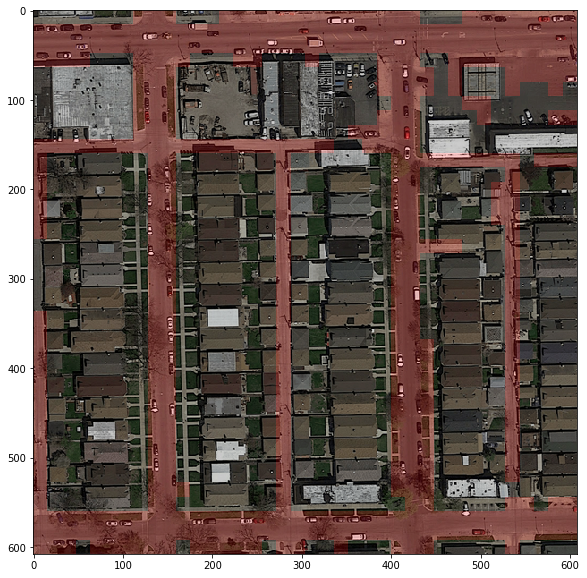

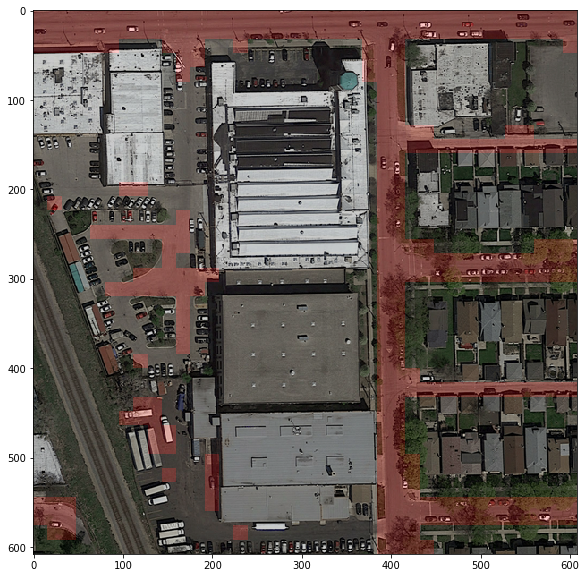

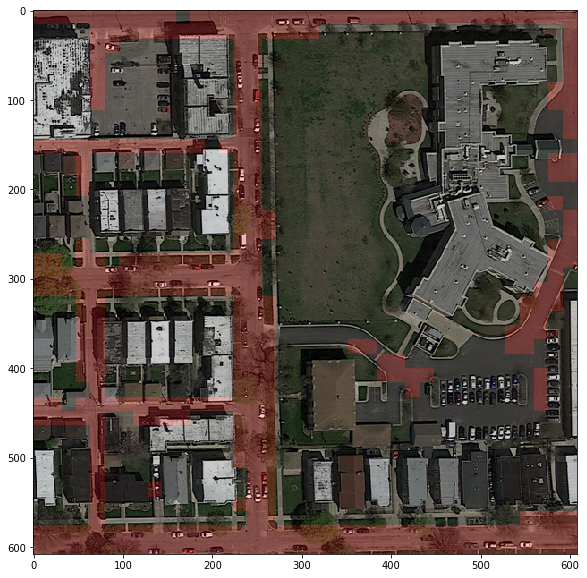

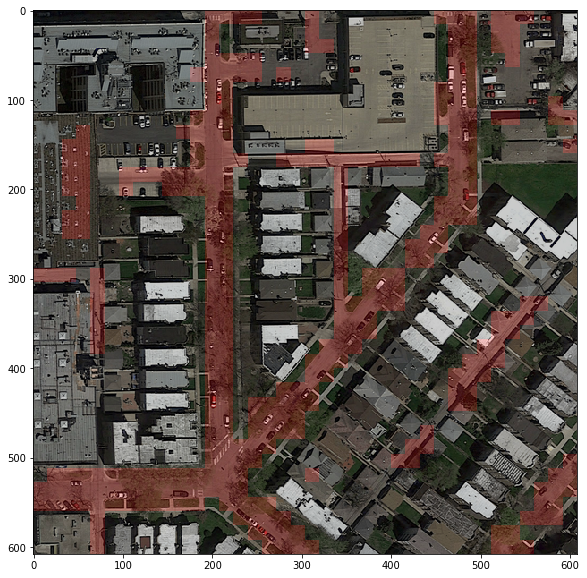

KeyboardInterrupt: 

In [9]:
# Use the model to predict and create the submission file.
submission_with_model(model, 'submission_test.csv')